In [1]:
using Plots

In [2]:
include("one_population.jl")

!!!!

Main.one_population_model

In [3]:
x = 1.0
mu = 0.0
sigma = 2.0
opt = 1.0
scale = 20.0
Vle = 0.5
r = 1.5
k = 1.0

model = one_population_model.population(x,mu,sigma,opt,scale,Vle,r,k)


Main.one_population_model.population(1.0, 0.0, 2.0, 1.0, 20.0, 0.5, 1.5, 1.0)

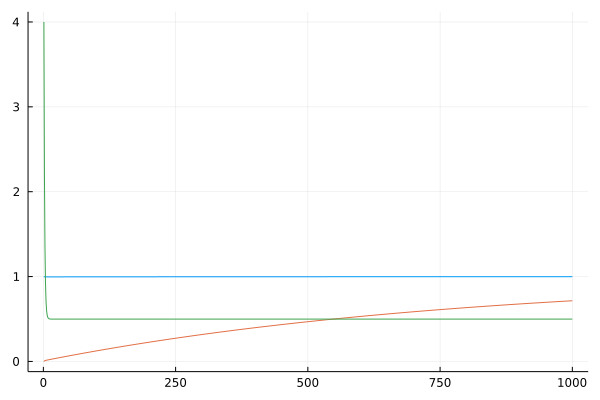

In [4]:
n = 1000
x = zeros(n)
mu = zeros(n)
sigma = zeros(n)

for i in 1:n 
    x[i] = model.x
    mu[i] = model.mu
    sigma[i] = model.sigma
    model = one_population_model.update_populaion!(model)
end
Plots.plot(x)
Plots.plot!(mu)
Plots.plot!(sigma.^2)

In [5]:
x = 1.0
mu = 0.0
sigma = 1.0
opt = 0.0
scale = 1.0
opt_H = 3.0
scale_H = 1.0
Vle = 1.00
r = 1.31
k = 1.0
prop = 0.02
max = 0.01
model2 = one_population_model.population_hatchery(x,mu,sigma,opt,scale,opt_H,scale_H,Vle,r,k,prop,max)


Main.one_population_model.population_hatchery(1.0, 0.0, 1.0, 0.0, 1.0, 3.0, 1.0, 1.0, 1.31, 1.0, 0.02, 0.01)

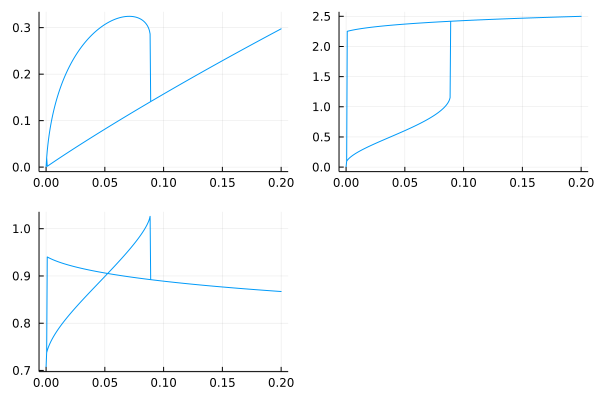

In [6]:
releases = 0:0.0005:0.2
n = length(releases)
x = zeros(2*n)
mu = zeros(2*n)
sigma = zeros(2*n)
for i in 1:n
    model2 = one_population_model.equilibrium_population_fpi(model2,releases[i])
    x[i] = model2.x
    mu[i] = model2.mu
    sigma[i] = model2.sigma
end

for i in 1:n
    model2 = one_population_model.equilibrium_population_fpi(model2,releases[n-i+1])
    x[n+i] = model2.x
    mu[n+i] = model2.mu
    sigma[n+i] = model2.sigma
end

y = vcat(releases, reverse(releases))
p1 = Plots.plot(y,x)
p2 = Plots.plot(y,mu)
p3 = Plots.plot(y,sigma.^2)
plot(p1,p2,p3)

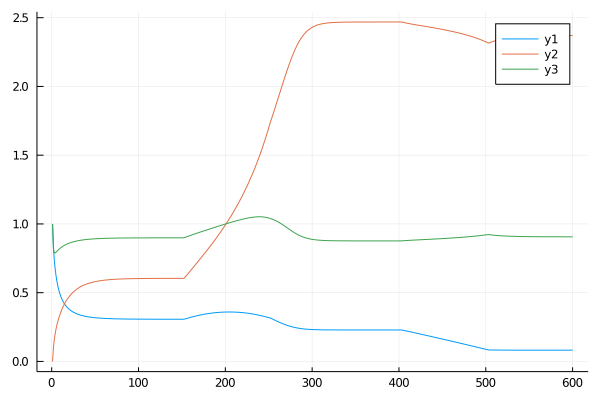

In [1398]:
n = 600
x = zeros(n)
mu = zeros(n)
sigma = zeros(n)

releases = vcat(repeat([0.05],150),0.05:0.001:0.15,  repeat([0.15],150), 0.15:-0.001:0.05,  repeat([0.05],n))

for i in 1:n 
    x[i] = model2.x
    mu[i] = model2.mu
    sigma[i] = model2.sigma
    model2 = one_population_model.update_populaion_hatchery!(model2, releases[i])
end
Plots.plot(x)
Plots.plot!(mu)
Plots.plot!(sigma.^2)


In [1396]:
0.15:-0.001:0.05

0.15:-0.001:0.05

In [1400]:
include("../quant_gen_code/mixture_of_normals.jl")
include("../quant_gen_code/rieman.jl")
include("../quant_gen_code/utils.jl")
include("one_population.jl")
using Plots

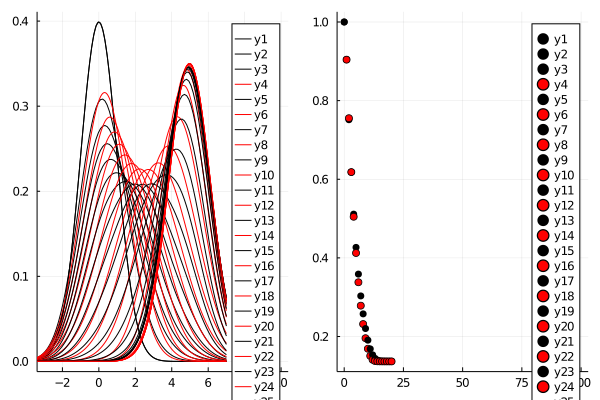

In [1437]:
a = -5
b = 7
n = 100

x = 1.0
opt = 0.0
scale = 1.0
opt_H = 5.0
scale_H = 1.0
Vle = 2.0
r = 1.4
k = 1.0
prop = 0.02
max = 0.01

mu = 0.0
sigma = 1.0


v = -5.0:0.05:7.0

# i = 0
# dsn = rieman_gen.init_step_function_normal(a,b,n,mu,sigma)
# model= one_population_model.population_hatchery_rieman(x,dsn,opt,scale,opt_H,scale_H,Vle,r,k,prop,max)
# p1 = Plots.plot(model.dsn.nodes,model.dsn.values,color = "black", xlim = [-3,10])
# p2 = Plots.scatter([i],[model.x],color = "black", xlim = [0,100])

# model2 = one_population_model.population_hatchery(x,mu,sigma,opt,scale,opt_H,scale_H,Vle,r,k,prop,max)
# Plots.plot!(p1,v, broadcast(x -> utils.normal_density(model2.mu, model2.sigma, x),v),color = "black")
# Plots.scatter!(p2,[i],[model2.x],color = "black")


i += 1 
model = one_population_model.update_populaion_hatchery_rieman!(model, 0.1)
Plots.plot!(p1, model.dsn.nodes,model.dsn.values, color = "black")
Plots.scatter!(p2,[i],[model.x],color = "black")


model2 = one_population_model.update_populaion_hatchery!(model2, 0.1)
Plots.plot!(p1, v, broadcast(x -> utils.normal_density(model2.mu, model2.sigma, x),v), color = "red")
Plots.scatter!(p2,[i],[model2.x],color = "red")  
plot(p1,p2)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 

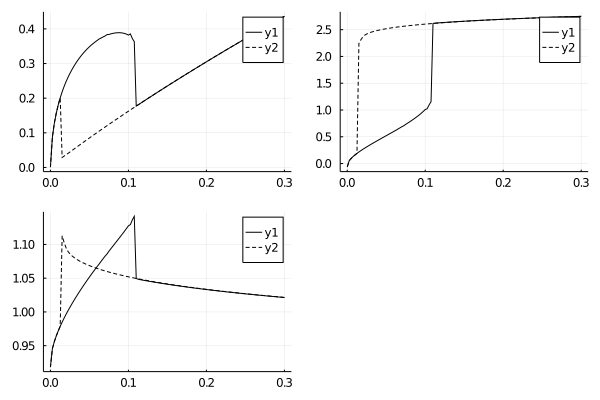

In [1364]:
a = -5
b = 7
n = 100



x = 1.0
opt = 0.0
scale = 1.0
opt_H = 3.25
scale_H = 1.0
Vle = 1.0
r = 1.375
k = 1.0
prop = 0.02
max = 0.01

mu = 0.0
sigma = 1.0


v = -5.0:0.025:8.0

i = 0
dsn = rieman_gen.init_step_function_normal(a,b,n,mu,sigma)
model = one_population_model.population_hatchery_rieman(x,dsn,opt,scale,opt_H,scale_H,Vle,r,k,prop,max)

releases = 0:0.0025:0.3
n = length(releases)
x1 = zeros(n)
mu1 = zeros(n)
sigma1 = zeros(n)
for i in 1:n
    print(i)
    print(" ")
    model = one_population_model.equilibrium_population_rieman_fpi(model,releases[i])
    x1[i] = model.x
    mu1[i] = sum(model.dsn.nodes .* model.dsn.values .* model.dsn.interval)
    sigma1[i] = sqrt(sum((model.dsn.nodes.-mu1[i]).^2 .* model.dsn.values .* model.dsn.interval))
end

x2 = zeros(n)
mu2 = zeros(n)
sigma2 = zeros(n)
print("\n")
for i in 1:n
    print(i)
    print(" ")
    model = one_population_model.equilibrium_population_rieman_fpi(model,releases[n-i+1])
    x2[i] = model.x
    mu2[i] = sum(model.dsn.nodes .* model.dsn.values .* model.dsn.interval)
    sigma2[i] = sqrt(sum((model.dsn.nodes.-mu2[i]).^2 .* model.dsn.values .* model.dsn.interval))
end

y = vcat(releases)
p1 = Plots.plot(releases,x1, color = "black")
Plots.plot!(p1,reverse(releases),x2, color = "black", linestyle =:dash)
p2 = Plots.plot(releases,mu1, color = "black")
Plots.plot!(p2,reverse(releases),mu2, color = "black", linestyle =:dash)
p3 = Plots.plot(releases,sigma1, color = "black")
Plots.plot!(p3,reverse(releases),sigma2, color = "black", linestyle =:dash)
plot(p1,p2,p3)


In [1359]:
n = 1000

model = one_population_model.equilibrium_population_rieman_fpi(model,0.1)
mu = zeros(n)
x = zeros(n)
sigma = zeros(n)
releases = vcat(repeat([0.025],200), collect(0.01:0.001:0.7), )

for i in 1:n 
    x[i] = model.x
    mu[i] = sum(model.dsn.nodes .* model.dsn.values .* model.dsn.interval)
    sigma[i] = sqrt(sum((model.dsn.nodes.-mu[i]).^2 .* model.dsn.values .* model.dsn.interval))
    model = one_population_model.update_populaion_hatchery_rieman!(model, releases[i])
end
Plots.plot(x)
Plots.plot!(mu)
Plots.plot!(sigma.^2)

LoadError: [91mBoundsError: attempt to access 891-element Array{Float64,1} at index [892][39m

0.2494024245831087

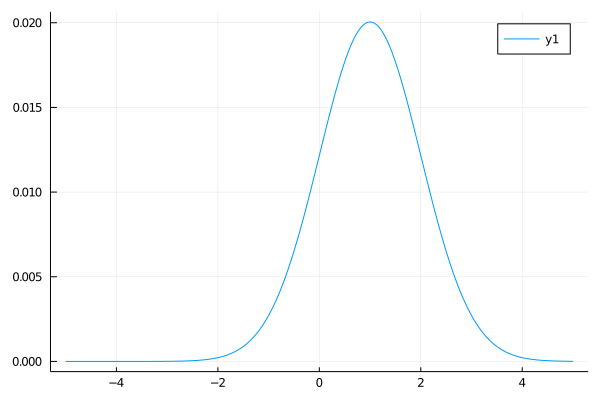

In [692]:
f,x = rieman_gen.stabalizing_selection!(f, 1, 1, 1)
print(x)
Plots.plot(f.nodes,f.values)

In [707]:
n = 50
product = transpose(f.values) .* f.values 
differnce = (f.nodes .+ transpose(f.nodes) )./2

function conv(step_function, product, n)
    values = abs.(   ((step_function.nodes) .- transpose(step_function.nodes)) .- step_function.nodes[n])
    tf = values .< step_function.interval
    return sum(tf .* product)/2
end

#
#
function conv2(step_function, product, n)
    vals = abs.(differnce.- step_function.nodes[n])
    tf = vals .< log(step_function.n)*step_function.interval
    return sum( tf .* product)/(2*log(step_function.n))
end



conv2 (generic function with 1 method)

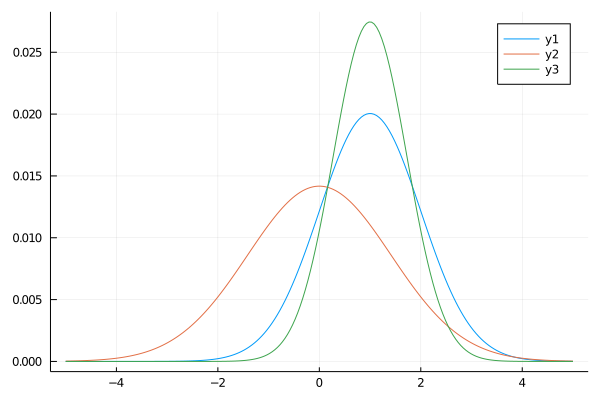

In [708]:
Plots.plot(f.nodes,f.values)
Plots.plot!(f.nodes,broadcast(n -> conv(f, product, n), 1:f.n))
Plots.plot!(f.nodes,broadcast(n -> conv2(f, product, n), 1:f.n))


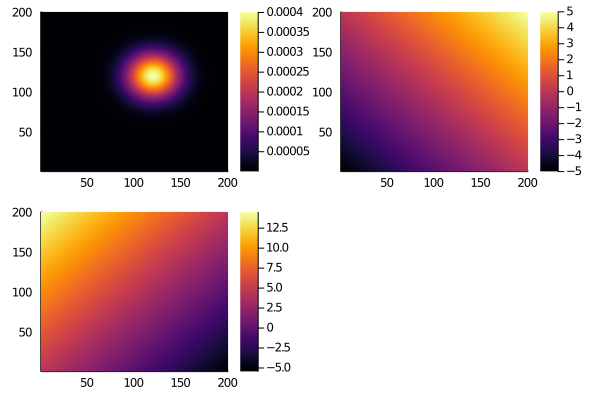

In [704]:
p1 = Plots.heatmap(product)
p2 = Plots.heatmap(differnce)
p3 = Plots.heatmap(((f.nodes) .- transpose(f.nodes)) .- f.nodes[10])
plot(p1,p2,p3)

In [431]:
v1 = broadcast(n -> conv(f, product, n), 1:f.n)
sum(v1)

0.9996043586295964

In [432]:
v2 = broadcast(n -> conv2(f, product, n), 1:f.n)
sum(v2)

1.0056949530874755

In [433]:
v3 = broadcast(n -> conv3(f, product, n), 1:f.n)
sum(v3)

0.9251472584314879

In [434]:
sum(v1 .* f.nodes.^2)

1.9886556086499516

In [435]:
v2 = v2 ./ sum(v2)
sum(v2 .* f.nodes.^2)

0.5052137810196139

In [436]:
sum(v3 .* f.nodes.^2)

0.4335045750909373

In [710]:
nu_grid = rieman.init_step_function_normal(-5,5,200,0,sqrt(0.3))

Main.rieman.step_function(-5.0, 5.0, 200, 0.05025125628140704, [-5.0, -4.949748743718593, -4.899497487437186, -4.849246231155779, -4.798994974874372, -4.748743718592965, -4.698492462311558, -4.648241206030151, -4.597989949748744, -4.547738693467337  …  4.547738693467337, 4.597989949748744, 4.648241206030151, 4.698492462311558, 4.748743718592965, 4.798994974874372, 4.849246231155779, 4.899497487437186, 4.949748743718593, 5.0], [2.9369256308902146e-20, 6.757652865618573e-20, 1.5418538972327603e-19, 3.488469914445285e-19, 7.82656426615553e-19, 1.7412123723688126e-18, 3.841286924809877e-18, 8.403228372388208e-18, 1.82288805746616e-17, 3.9211932632058776e-17  …  3.9211932632058776e-17, 1.82288805746616e-17, 8.403228372388208e-18, 3.841286924809877e-18, 1.7412123723688126e-18, 7.82656426615553e-19, 3.488469914445285e-19, 1.5418538972327603e-19, 6.757652865618573e-20, 2.9369256308902146e-20])

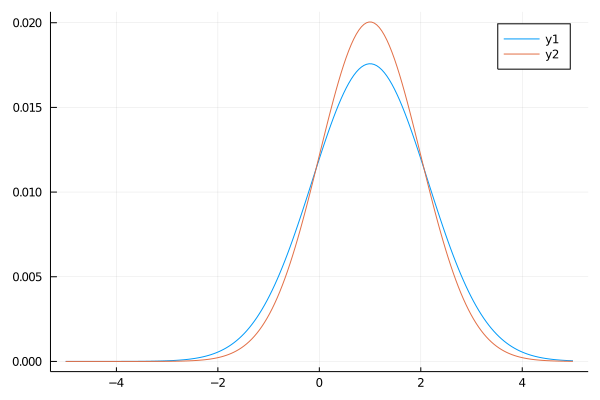

In [711]:



product = nu_grid.values .* transpose(f.values)
difference = nu_grid.nodes .+ transpose(f.nodes)

Plots.plot(f.nodes,broadcast(n -> conv_2(f,nu_grid,product,difference,n),1:f.n))
Plots.plot!(f.nodes,f.values)

In [526]:
v1 = broadcast(n -> conv_2(f,nu_grid,product,difference,n),1:f.n)
sum(v1.*f.nodes.^2)

1.2989901475064438

In [527]:
sum(f.values.*f.nodes.^2)

0.999985836907573

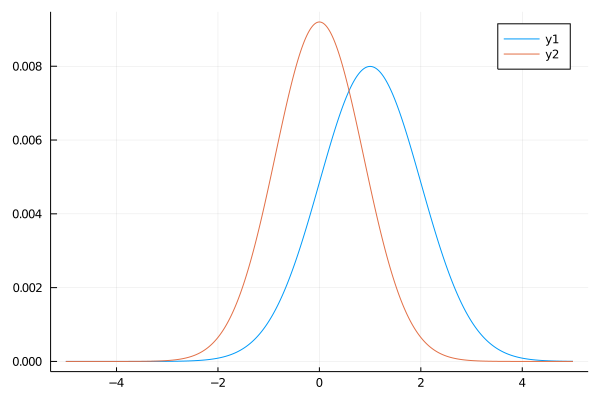

In [666]:
include("../quant_gen_code/rieman.jl")
f = rieman_gen.init_step_function_normal(-5,5,500,1,1)
Plots.plot(f.nodes,f.values)
f = rieman_gen.random_mating!(f, 0.5)
Plots.plot!(f.nodes,f.values)

In [667]:
sum(f.values.*f.nodes.^2)

0.755063350219377

0.625

In [1439]:
using Distributions
d = Distributions.Normal()

Normal{Float64}(μ=0.0, σ=1.0)

In [1441]:
rand(d,1)

1-element Array{Float64,1}:
 0.299871251301632

In [1450]:
s = Distributions.Chisq.((5,2))
v = rand(d,2)

LoadError: [91msyntax: invalid assignment location "[d, c]" around In[1450]:1[39m

Chisq{Float64}(ν=1.0)